# Analysts requirements

This notebook contains data queries (required by analysts) along with the explanation.

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('db.sqlite')

# 1) 

> **You are working with an analyst that would like to be able to graph the population of any major metropolitan area in the US over time. Annual estimates are sufficient for this customer**

First, lets query the relevant data from the `population` table in our database. We will use pandas library to handle the SQL query and DB interface.

Notice, we are concerned about the metropolitan areas only. In the `population` table, the column `STCOU` (State and county code) represents the county code. When this column is NULL, the row corresponds to a metropolitan area not a county.

In [3]:
sql1 = """
SELECT 
    NAME, YEAR, POPULATION_EST
FROM
    population
WHERE
    STCOU is NULL;
"""

In [4]:
df1 = pd.read_sql(sql1, conn)

Lets graph the popluation of some random sample of metropolitan areas in the US over the past 8 years

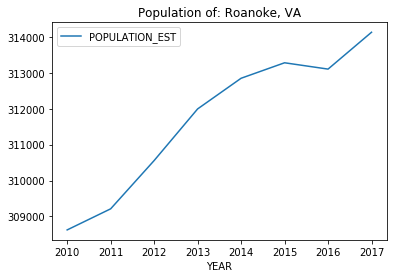

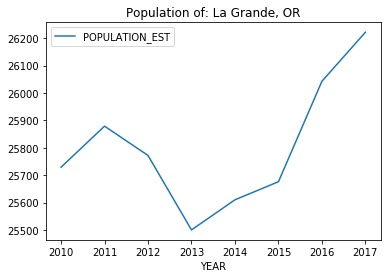

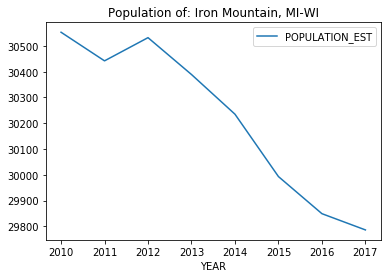

In [5]:
from random import choice

metro_names = list(df1['NAME'])
sample_metro_names = [choice(metro_names) for _ in range(3)]
                      
for metro in sample_metro_names:
    df1[df1['NAME'] == metro].set_index('YEAR').plot(title=f'Population of: {metro}')

<hr>

# 2) 

> **A different analyst wants to know about population and unemployment rates of the US at the county level. Annual estimates are sufficient for this customer**

For this requirement, we will need data from two tables in our database `population` and `unemployment`, where they will be joined on the county code and the year.

In [6]:
sql2 = """
SELECT 
    unemployment.Area_name as county,
    population.year,
    population.POPULATION_EST as population,
    unemployment.unemployment_rate
FROM
    unemployment
JOIN 
    population 
ON 
    population.STCOU = unemployment.FIPStxt 
AND
    population.YEAR = unemployment.Year
"""

In [7]:
df2 = pd.read_sql(sql2, conn)

Here is an example of the queried data:

In [8]:
df2.head(4)

,county,YEAR,population,unemployment_rate
0,"Autauga County, AL",2010,54750,8.9
1,"Baldwin County, AL",2010,183110,10.0
2,"Barbour County, AL",2010,27332,12.3
3,"Bibb County, AL",2010,22872,11.4


Notice, the above dataframe is not analysis-friendly!

So we can simplify it into a pivot table where the index is a joint of the county name and year. This way it is easier to anlayze population vs. unemployment rate for a single county over time.

In [9]:
df2 = df2.pivot_table(index=list(df2.columns[:-2]))

In [10]:
df2.to_csv('pop_unemp_county_US.csv') # optionally save to a csv file

In [11]:
df2

population  unemployment_rate
county               YEAR                               
Abbeville County, SC 2010       25328               13.6
                     2011       25082               12.5
                     2012       25019               10.6
                     2013       24901                9.5
                     2014       24800                7.7
                     2015       24802                6.9
                     2016       24717                5.5
                     2017       24722                4.6
Acadia Parish, LA    2010       61859                7.3
                     2011       61826                6.7
                     2012       61984                6.0
                     2013       62284                6.0
                     2014       62664                5.8
                     2015       62696                6.8
                     2016       62800                7.4
                     2017       62590                5.9
Ada County, ID       2010      393446                8.3
                     2011      400995                7.3
                     2012      408915                6.2
                     2013      416074                5.2
                     2014      425627                4.2
                     2015      432768                3.7
                     2016      444269                3.3
                     2017      456849                2.8
Adair County, MO     2010       25625                8.7
                     2011       25635                8.6
                     2012       25668                7.0
                     2013       25709                6.9
                     2014       25537                6.5
                     2015       25339                5.6
...                               ...                ...
York County, VA      2012       65892                5.8
                     2013       66079                5.4
                     2014       66601                5.0
                     2015       67821                4.3
                     2016       67742                3.9
                     2017       67739                3.6
Yuba County, CA      2010       72351               17.8
                     2011       72511               17.0
                     2012       72832               15.4
                     2013       73159               13.2
                     2014       73642               11.2
                     2015       74201                9.3
                     2016       75185                8.6
                     2017       77031                7.4
Yuma County, AZ      2010      197124               25.1
                     2011      202581               24.2
                     2012      202105               23.9
                     2013      201810               25.5
                     2014      203039               22.9
                     2015      203558               21.7
                     2016      205463               18.8
                     2017      207534               17.0
Zapata County, TX    2010       14087               10.4
                     2011       14223                8.1
                     2012       14269                6.3
                     2013       14393                6.2
                     2014       14396                5.2
                     2015       14516                7.6
                     2016       14449               10.8
                     2017       14322                7.3

[14592 rows x 2 columns]